In [53]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [54]:
def read_csv(path, file):
    '''
        This function is used to read the csv file
    '''
    data = pd.read_csv(path + file)
    return data

In [55]:
# can define by ourselves
path = "pollen/" 

In [56]:
# read pollen data from VM
grass = read_csv(path, "Grass.csv")

In [57]:
grass

Location  Count Date  Count Sample Time  Total  QCL   Latitude  \
0             1  2017-09-26    0.0    09:00:00   76.0  2.0 -37.797109   
1             1  2017-09-27    0.0    09:00:00  335.0  2.0 -37.797109   
2             1  2017-09-28    3.0    09:00:00  857.0  2.0 -37.797109   
3             1  2017-09-29    0.0    09:00:00  235.0  2.0 -37.797109   
4             1  2017-09-30    0.0    10:40:00  263.0  2.0 -37.797109   
...         ...         ...    ...         ...    ...  ...        ...   
19545        41  2008-11-26    0.0    09:00:00   18.0  2.0 -33.425018   
19546        41  2008-11-27   14.0    09:00:00   32.0  2.0 -33.425018   
19547        41  2008-11-28    0.0    09:00:00    4.0  2.0 -33.425018   
19548        41  2008-11-29    5.0    09:00:00   22.0  2.0 -33.425018   
19549        41  2008-11-30    0.0    09:00:00    0.0  2.0 -33.425018   

        Longitude  Elevation SchColTime         Name          NameMLFile  \
0      144.964880       28.0   09:00:00    Melbourne  MelbourneParkville   
1      144.964880       28.0   09:00:00    Melbourne  MelbourneParkville   
2      144.964880       28.0   09:00:00    Melbourne  MelbourneParkville   
3      144.964880       28.0   09:00:00    Melbourne  MelbourneParkville   
4      144.964880       28.0   09:00:00    Melbourne  MelbourneParkville   
...           ...        ...        ...          ...                 ...   
19545  151.341732       20.0   09:00:00  NSW-Gosford     SydneyMacquarie   
19546  151.341732       20.0   09:00:00  NSW-Gosford     SydneyMacquarie   
19547  151.341732       20.0   09:00:00  NSW-Gosford     SydneyMacquarie   
19548  151.341732       20.0   09:00:00  NSW-Gosford     SydneyMacquarie   
19549  151.341732       20.0   09:00:00  NSW-Gosford     SydneyMacquarie   

       Continuation Location State  
0                        NaN   VIC  
1                        NaN   VIC  
2                        NaN   VIC  
3                        NaN   VIC  
4                        NaN   VIC  
...                      ...   ...  
19545                    NaN   NSW  
19546                    NaN   NSW  
19547                    NaN   NSW  
19548                    NaN   NSW  
19549                    NaN   NSW  

[19550 rows x 14 columns]

In [58]:
def extract_columns(data, rename_col, rename_to, columns):
    '''
        This function is mainly applied on the original pollen dataset, aiming to extract the useful columns
        and try to redefine the column 'Count' more specific
    '''
    data_clean = data[columns]
    data_clean = data_clean.rename(columns = {rename_col: rename_to})
    return data_clean

In [59]:
useful_col = {'Location', 'Count Date', 'Total', 'Name', 'Count'}
rename_col = 'Count'

In [60]:
grass_clean = extract_columns(grass, rename_col, "grass_count", useful_col)
grass_clean

Location         Name  grass_count  Count Date  Total
0             1    Melbourne          0.0  2017-09-26   76.0
1             1    Melbourne          0.0  2017-09-27  335.0
2             1    Melbourne          3.0  2017-09-28  857.0
3             1    Melbourne          0.0  2017-09-29  235.0
4             1    Melbourne          0.0  2017-09-30  263.0
...         ...          ...          ...         ...    ...
19545        41  NSW-Gosford          0.0  2008-11-26   18.0
19546        41  NSW-Gosford         14.0  2008-11-27   32.0
19547        41  NSW-Gosford          0.0  2008-11-28    4.0
19548        41  NSW-Gosford          5.0  2008-11-29   22.0
19549        41  NSW-Gosford          0.0  2008-11-30    0.0

[19550 rows x 5 columns]

In [61]:
grass_clean[grass_clean['Location']==25]

Location                 Name  grass_count  Count Date  Total
12585        25  Melbourne_1991-2002          0.0  1991-10-01  115.0
12586        25  Melbourne_1991-2002          0.0  1991-10-02   26.0
12587        25  Melbourne_1991-2002          0.0  1991-10-03   11.0
12588        25  Melbourne_1991-2002          0.0  1991-10-04  155.0
12589        25  Melbourne_1991-2002          0.0  1991-10-05  241.0
...         ...                  ...          ...         ...    ...
13624        25  Melbourne_1991-2002         35.0  2002-12-27  137.0
13625        25  Melbourne_1991-2002         27.0  2002-12-28   72.0
13626        25  Melbourne_1991-2002         83.0  2002-12-29  290.0
13627        25  Melbourne_1991-2002         12.0  2002-12-30   45.0
13628        25  Melbourne_1991-2002          3.0  2002-12-31   36.0

[1044 rows x 5 columns]

In [62]:
grass_clean[grass_clean['Location']==1]

Location       Name  grass_count  Count Date  Total
0           1  Melbourne          0.0  2017-09-26   76.0
1           1  Melbourne          0.0  2017-09-27  335.0
2           1  Melbourne          3.0  2017-09-28  857.0
3           1  Melbourne          0.0  2017-09-29  235.0
4           1  Melbourne          0.0  2017-09-30  263.0
..        ...        ...          ...         ...    ...
425         1  Melbourne          1.0  2021-01-27   15.0
426         1  Melbourne          7.0  2021-01-28   40.0
427         1  Melbourne          2.0  2021-01-29   60.0
428         1  Melbourne          0.0  2021-01-30    3.0
429         1  Melbourne          0.0  2021-01-31   12.0

[430 rows x 5 columns]

In [63]:
grass_clean[grass_clean['Location']==28]

Location                 Name  grass_count  Count Date  Total
13876        28  Melbourne_2003-2006          0.0  2003-10-01  249.0
13877        28  Melbourne_2003-2006          0.0  2003-10-02   86.0
13878        28  Melbourne_2003-2006          0.0  2003-10-03  392.0
13879        28  Melbourne_2003-2006          5.0  2003-10-04  215.0
13880        28  Melbourne_2003-2006          6.0  2003-10-05  327.0
...         ...                  ...          ...         ...    ...
14238        28  Melbourne_2003-2006          0.0  2006-12-27    9.0
14239        28  Melbourne_2003-2006          0.0  2006-12-28    8.0
14240        28  Melbourne_2003-2006          2.0  2006-12-29   50.0
14241        28  Melbourne_2003-2006          0.0  2006-12-30   83.0
14242        28  Melbourne_2003-2006          0.0  2006-12-31   57.0

[367 rows x 5 columns]

In [64]:
grass_clean[grass_clean['Location']==29]

Location                   Name  grass_count  Count Date  Total
14243        29  Melbourne_(2007-2016)          3.0  2007-10-01  219.0
14244        29  Melbourne_(2007-2016)          6.0  2007-10-02  233.0
14245        29  Melbourne_(2007-2016)          8.0  2007-10-03  427.0
14246        29  Melbourne_(2007-2016)          2.0  2007-10-04  125.0
14247        29  Melbourne_(2007-2016)          6.0  2007-10-05  224.0
...         ...                    ...          ...         ...    ...
15239        29  Melbourne_(2007-2016)          1.0  2017-01-26   30.0
15240        29  Melbourne_(2007-2016)          2.0  2017-01-27   44.0
15241        29  Melbourne_(2007-2016)          7.0  2017-01-28   18.0
15242        29  Melbourne_(2007-2016)          4.0  2017-01-29   13.0
15243        29  Melbourne_(2007-2016)          6.0  2017-01-30   48.0

[1001 rows x 5 columns]

In [65]:
melbourne_grass_df = pd.DataFrame()

for i in [1, 25, 28, 29]:
    tmp = grass_clean.loc[grass_clean['Location']==i]
    melbourne_grass_df = pd.concat([melbourne_grass_df, tmp])

In [66]:
melbourne_grass_df = melbourne_grass_df.sort_values(by=['Count Date'])

In [67]:
melbourne_grass_df = melbourne_grass_df.drop(['Name', 'Location', 'Total'], axis = 1)

In [68]:
melbourne_grass_df

grass_count  Count Date
12585          0.0  1991-10-01
12586          0.0  1991-10-02
12587          0.0  1991-10-03
12588          0.0  1991-10-04
12589          0.0  1991-10-05
...            ...         ...
425            1.0  2021-01-27
426            7.0  2021-01-28
427            2.0  2021-01-29
428            0.0  2021-01-30
429            0.0  2021-01-31

[2842 rows x 2 columns]

In [69]:
melbourne_grass_df = melbourne_grass_df.set_index(pd.to_datetime(melbourne_grass_df['Count Date'])).drop('Count Date', axis=1)
melbourne_grass_df

grass_count
Count Date             
1991-10-01          0.0
1991-10-02          0.0
1991-10-03          0.0
1991-10-04          0.0
1991-10-05          0.0
...                 ...
2021-01-27          1.0
2021-01-28          7.0
2021-01-29          2.0
2021-01-30          0.0
2021-01-31          0.0

[2842 rows x 1 columns]

Text(0.5, 1.0, 'before feature engineering')

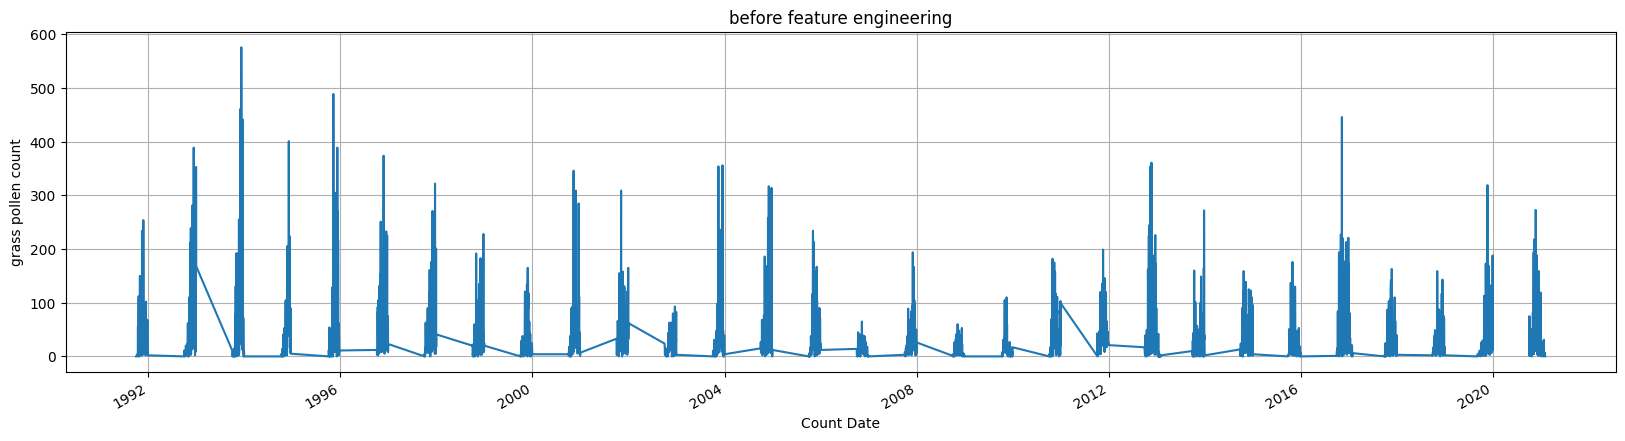

In [70]:
melbourne_grass_df['grass_count'].plot(figsize=(20,5))
plt.grid()
plt.ylabel("grass pollen count")
plt.title("before feature engineering")

In [71]:
melbourne_grass_df = melbourne_grass_df.resample('D').asfreq()

In [72]:
melbourne_grass_df = melbourne_grass_df.fillna(0)

Text(0.5, 1.0, 'after feature engineering')

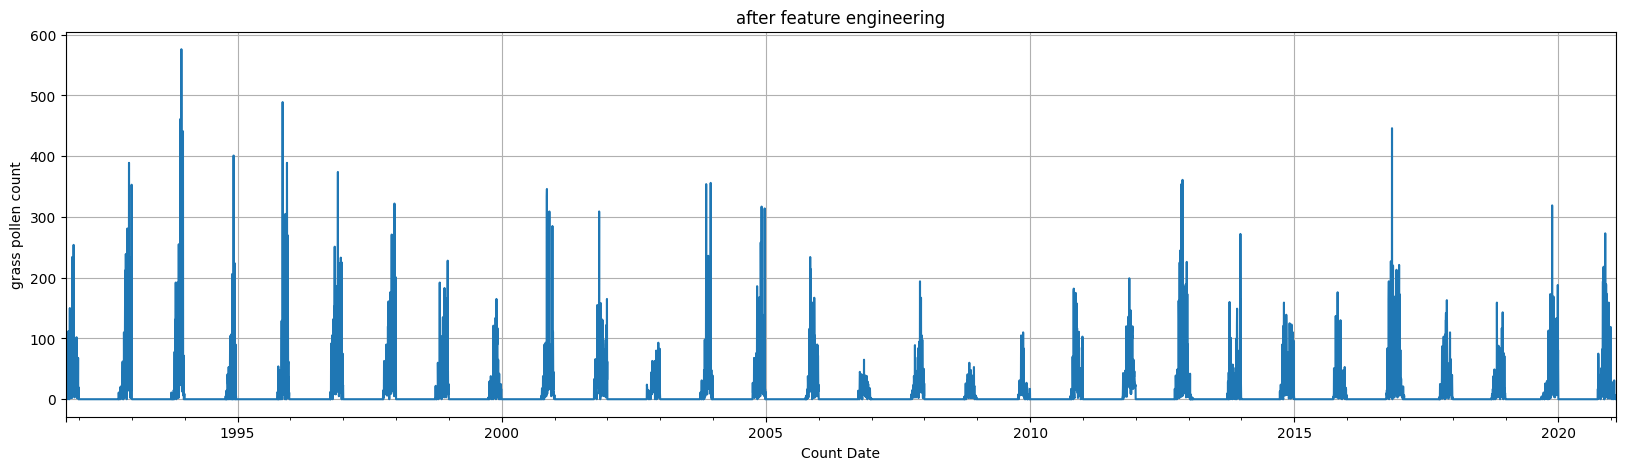

In [73]:
melbourne_grass_df['grass_count'].plot(figsize=(20,5))
plt.grid()
plt.ylabel("grass pollen count")
plt.title("after feature engineering")

In [74]:
# date = datetime(1999, 01, 01)
# date += timedelta(days=1)

# print(date)

In [75]:
melbourne_grass_df

grass_count
Count Date             
1991-10-01          0.0
1991-10-02          0.0
1991-10-03          0.0
1991-10-04          0.0
1991-10-05          0.0
...                 ...
2021-01-27          1.0
2021-01-28          7.0
2021-01-29          2.0
2021-01-30          0.0
2021-01-31          0.0

[10716 rows x 1 columns]

In [76]:
melbourne_grass_df.to_csv("melbourne_grass_preprocessed.csv")